In [277]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from random import randint

In [278]:
rosenburg = lambda x0, x1: 100 * ((x1-x0**2)**2) + (1 - x0)**2
rosenburg_grad = lambda x0, x1: np.array([-400*x0*(x1-x0**2)-2*(1-x0), 200*(x1 - x0**2)])
rosenburg_hessian = lambda x0, x1: np.array([[-400*(x1-x0**2) + 800 * x0**2 + 2, -400*x0],[-400*x0, 200]])


rastrigin = lambda x0, x1: (x0 ** 2 + 10 * (np.cos(2 * np.pi * x0))) + (x1 ** 2+ 10 * (1 - np.cos(2 * np.pi * x1)))
rastrigin_grad = lambda x0, x1: np.array([2*x0 + 20*np.pi*np.sin(2*np.pi*x0), 2*x1 + 20*np.pi*np.sin(2*np.pi*x1)])
rastrigin_hessian = lambda x0, x1: np.array([[2 + 40*(np.pi**2)*np.cos(2*np.pi*x0), 0],[0, 2 + 40*(np.pi**2)*np.cos(2*np.pi*x1)]])

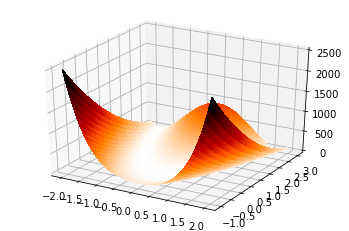

In [279]:
def plot_rosenburg():
    plot = plt.axes(projection="3d")
    X = np.arange(-2, 2, 0.001)
    Y = np.arange(-1, 3, 0.001)
    X, Y = np.meshgrid(X, Y)
    Z = rosenburg(X,Y)
    plot.plot_surface(X, Y, Z, cmap=cm.gist_heat_r,
                       linewidth=0, antialiased=False)

plot_rosenburg()

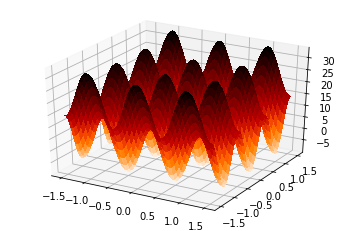

In [280]:
def plot_rastign():
    plot = plt.axes(projection="3d")
    X = np.arange(-1.5, 1.5, 0.001)
    Y = np.arange(-1.5, 1.5, 0.001)
    X, Y = np.meshgrid(X, Y)
    Z = rastrigin(X,Y)
    plot.plot_surface(X, Y, Z, cmap=cm.gist_heat_r,
                       linewidth=0, antialiased=False)

plot_rastign()

We set $\epsilon = 0.0001$

In [281]:
def mini_NR(func, x0, gradient, hessian, iteration_err = 0.0001, max_iterations = 10000):
    x: list = [np.inf, x0]
    i = 0
    # moet nog ergens een stopping condition bij
    while np.abs(np.linalg.norm(x[-1] - x[-2])) > iteration_err and i < max_iterations:
        print("change", np.linalg.inv(hessian(x[-1][0], x[-1][1])).dot(gradient(x[-1][0], x[-1][1])))
        x.append(x[-1] - np.linalg.inv(hessian(x[-1][0], x[-1][1])).dot(gradient(x[-1][0], x[-1][1])))
        print("current value", func(x[-1][0], x[-1][1]))
        i += 1

    print(i)
    return x[-1]

In [282]:
def randint_multiple(start, stop, size):
    random_ints = []
    for _ in range(size):
        random_ints.append(randint(start, stop))

    return random_ints

def generate_rand_bound(bound, size):
    length = np.abs(bound[0] - bound[1])
    return np.add(np.random.rand(size) * length, bound[0])

def generate_random_points(bound, size):
    """The most inefficient way to create random points in a bound!"""
    a = []
    for b in bound:
        a.append(generate_rand_bound(b, size))
        
    c = np.zeros((size, bound.shape[0]))

    for i in range(size):
        for j in range(bound.shape[0]):
            c[i][j] = a[j][i]

    return c

def get_values(func, estimations):
    # print(estimations.shape[0])
    values = np.zeros(estimations.shape[0])

    for i in range(estimations.shape[0]):
        values[i] = func(estimations[i][0], estimations[i][1])

    return values

def mini_de(func, bound, popsize, mutation, max_generations = 100, max_std = 0.0000000000000000001):
    # init with random points from bound.
    x = [generate_random_points(bound, popsize)]
    for _ in range(1, max_generations):
        z = np.zeros((popsize, bound.shape[0]))

        for j in range(popsize):
            r0, r1, r2 = randint_multiple(0, popsize - 1, 3)
            z[j] = np.add(x[-1][r0], (x[-1][r1] - x[-1][r2]) * mutation)

            if not (func(z[j][0], z[j][1]) <= func(x[-1][j][0], x[-1][j][1])):
                z[j] = x[-1][j]

        x.append(z)

        if np.std(get_values(func, x[-1])) < max_std:
            print(_, "iterations")
            break

    return x[-1][np.argmin(get_values(func, x[-1]))]
        
    

# generate_random_points(np.array([[-5, 5], [-5, 5]]), 100)

print(mini_de(rosenburg, np.array([[-5, 5], [-5, 5]]), 100, 0.8))

[1.00000044 1.00000086]


In [283]:
def rosenburg_min():
    x0 = np.array([5, 5])
    x_min = mini_NR(rosenburg, x0, rosenburg_grad, rosenburg_hessian, 0.00001)

    print(x_min)

rosenburg_min()

change [ 9.99750062e-04 -1.99900025e+01]
current value 15.992002999100214
change [ 3.99820101 39.97401469]
current value 25553.976901310085
change [ 2.49909310e-07 -1.59856108e+01]
current value 6.383860101566039e-07
change [0.00079899 0.00159926]
current value 4.075366979750589e-11
change [ 9.99073328e-15 -6.38385990e-07]
current value 0.0
5
[1. 1.]


In [284]:
def rastrigin_min():
    x0=np.array([0.01, 0.01])
    x_min = mini_NR(rastrigin, x0, rastrigin_grad, rastrigin_hessian, 0.000001)
    print(x_min)

rastrigin_min()

change [0.01001311 0.01001311]
current value 10.00000000034394
change [-1.31137202e-05 -1.31137202e-05]
current value 10.0
change [2.95271552e-14 2.95271552e-14]
current value 10.0
3
[0. 0.]
